<a href="https://colab.research.google.com/github/abhilasha8/play_store_app_review_analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## <b> Import the Libraries

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


## <b> Read the data into data frame

In [3]:
path = '/content/Drive/My Drive/Colab Notebooks/PYTHON/Capstone Project - Play Store app Review/'
ps_df = pd.read_csv(path + 'Play Store Data.csv')
ur_df = pd.read_csv(path + 'User Reviews.csv')

## <b> Analyze the Play store app data

In [4]:
# Display the play store app data
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Check the shape of data
ps_df.shape

(10841, 13)

In [ ]:
# All columns name in the data frame
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Information about the data frame
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Statistical Description of data frame
ps_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 10841 rows and 13 columns in play store app data frame, dataset seems to have missing values most of which occurs for the Rating column, all the other column except Rating are in object datatype. So, the clean up is required.

## <b> Data Cleaning

1. Handling the NULL values

In [ ]:
# Find the NULL values
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Find the number of missing value in each column
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There is large number of NULL values in the Rating column, so we will drop all the NULL values.

In [5]:
# Drop the missing value in rating column
ps_df.dropna(subset=['Rating'],axis=0, inplace = True)

In [6]:
# Check the shape of the data frame after dropping the null values
ps_df.shape

(9367, 13)

In [ ]:
# recalculate the number of null values
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Since, there are few numbers of NULL values, so replace the NULL values with the mode values.

In [7]:
# replace the null values
ps_df['Android Ver'].fillna(ps_df['Android Ver'].mode()[0],inplace=True)
ps_df['Current Ver'].fillna(ps_df['Current Ver'].mode()[0],inplace=True)
ps_df['Content Rating'].fillna(ps_df['Content Rating'].mode()[0],inplace=True)

In [ ]:
# Final check for the missing values
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9367 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9367 non-null   object 
 12  Android Ver     9367 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


2. Handling the outliers

In [8]:
# Check the outliers
ps_df[ps_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


By looking at above row we can say that there is something wrong with the above row, because installs can't be free, type can't be 0, price can't be everyone and moreover, genres can't be a date. So, we have to decide the drop that row.

In [9]:
# Drop the row with wrong values
ps_df.drop([10472],inplace=True)

3. Handling the dulicate files

In [ ]:
# Check if there is any duplicate row or not
ps_df[ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


There are 474 rows with duplicate entries, so we have to dropped them.

In [10]:
# Drop the duplicate files
ps_df.drop_duplicates(inplace = True)

# Check the shape of the data frame after dropping the dulicate files
ps_df.shape

(8892, 13)

## <b> Data Processing

From the information of data frame we can see that all the columns except rating have the object data type but some of the columns like, reviews, size, installs and price have the numerical value. So, we have to convert them in proper data type.

Review Column: Convert the object data type into int data type

In [11]:
# processing on reviews column
ps_df['Reviews']=ps_df['Reviews'].astype('int')

Size Column: 

1.   Convert the size of all apps in one unit i.e. kb to Mb
2.   Remove the symbol K and M
1.   Convert the object data type to float data type            

In [12]:
# processing on size column

# drop the value which has size = varies with device
temp=ps_df[ps_df['Size']=='Varies with device'].index
ps_df.drop(labels=temp,inplace=True)

# Convert the size kb to Mb
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

# Convert the object data type to float data type
ps_df['Size']=ps_df['Size'].astype('float')

Installs Column:

1.   Remove the symbols '+' and ','
2.   Convert the object data type to int data type



In [13]:
# processing on installs column

# Remove the symbols + and ,
ps_df['Installs'] = ps_df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
ps_df['Installs'] = ps_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)

# Convert the object data type to int data type
ps_df['Installs']=ps_df['Installs'].astype('int')

Price Column:

1.   Remove the "$" symbol
2.   Convert the object data type to float data type



In [14]:
# processing on price column

# Remove the '$' symbols
ps_df['Price'] = ps_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)

# Convert the object data type to float data type
ps_df['Price']=ps_df['Price'].astype('float')

In [15]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7424 non-null   object 
 1   Category        7424 non-null   object 
 2   Rating          7424 non-null   float64
 3   Reviews         7424 non-null   int64  
 4   Size            7424 non-null   float64
 5   Installs        7424 non-null   int64  
 6   Type            7424 non-null   object 
 7   Price           7424 non-null   float64
 8   Content Rating  7424 non-null   object 
 9   Genres          7424 non-null   object 
 10  Last Updated    7424 non-null   object 
 11  Current Ver     7424 non-null   object 
 12  Android Ver     7424 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 812.0+ KB


## <b> Exploratory Data Analysis (EDA)

Plot a pairwise plot to see the relationship between the quantities.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


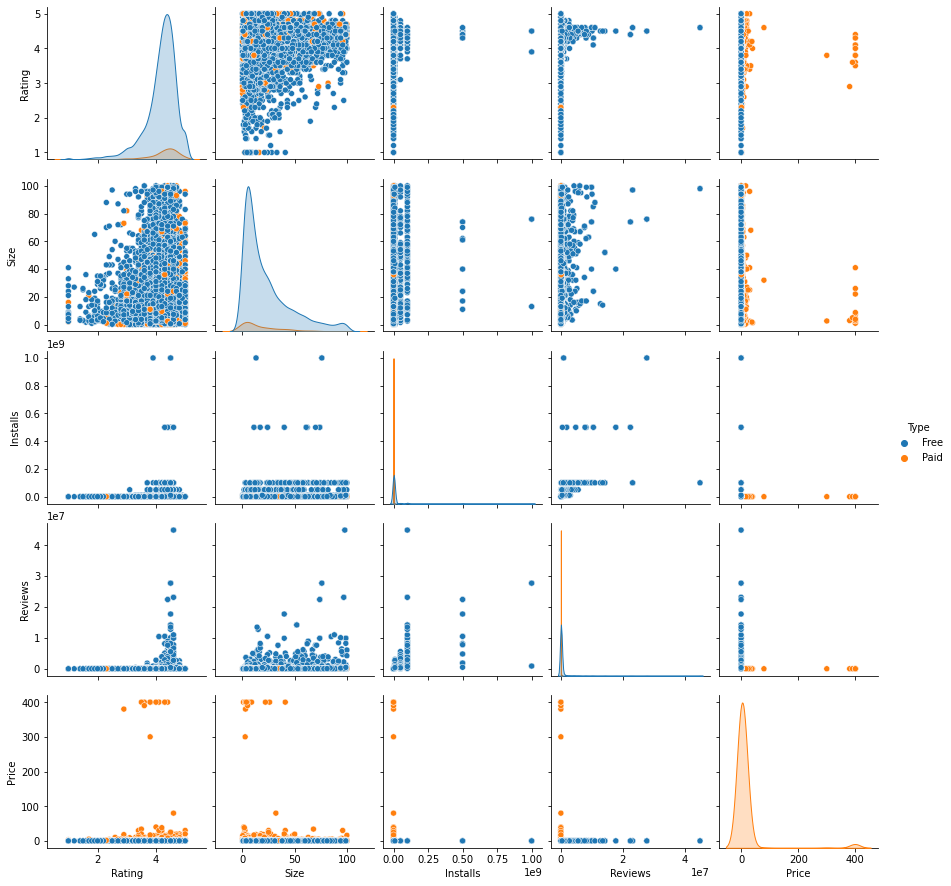

Text(0.5, 0.98, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

<Figure size 432x288 with 0 Axes>

In [23]:
# pairwise plot between "Reviews", "Size", "Rating" and "price"
sns.pairplot(ps_df[['Rating','Size','Installs','Reviews','Price', 'Type']], hue = 'Type')
plt.show()

In [45]:
# Find the correlation between the numerical columns
ps_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.080460,0.081966,0.054361,-0.021924
Reviews,0.080460,1.000000,0.240104,0.632040,-0.010010
Size,0.081966,0.240104,1.000000,0.167032,-0.026820
Installs,0.054361,0.632040,0.167032,1.000000,-0.010622
Price,-0.021924,-0.010010,-0.026820,-0.010622,1.000000


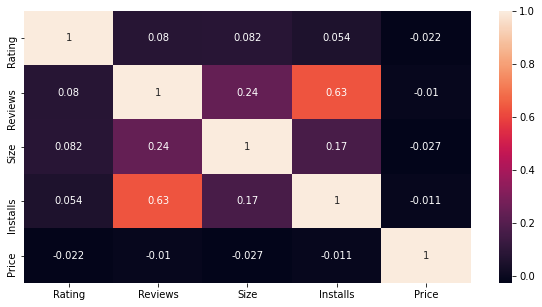

In [49]:
#Heat map
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(ps_df.corr(), annot=True)
#plt.show()

From the heat map we can say that there is maximum cross correlation between the Install and Review, which means that most installed apps have the maximum review.

Analysis of Single Column

1. Category: In the play store data frame all the apps defined under a particular category.

In [39]:
# all categories
ps_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [40]:
# count the number of apps for each and every category
category_count_df = ps_df.Category.value_counts()

Text(0.5, 0, 'Category')

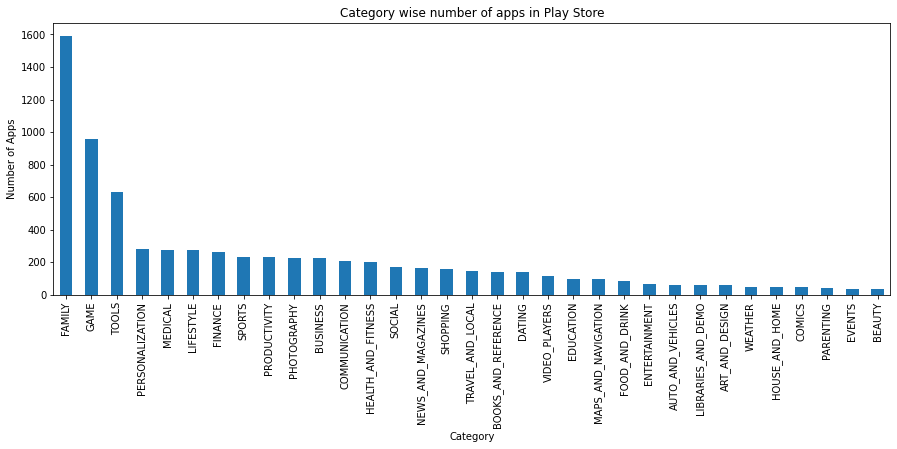

In [44]:
# plot the no of apps in all categories
category_count_df.plot(kind='bar')
#plt.rcParams['figure.figsize'] = (15, 5)
plt.title('Category wise number of apps in Play Store')
plt.ylabel('Number of Apps')
plt.xlabel('Category')

From the above plot we can analysis that the family and game category have the maximum apps in the play store and events and beauty category have the minimum apps in the play store.

2. Rating: What is the range of rating given to maximum apps?


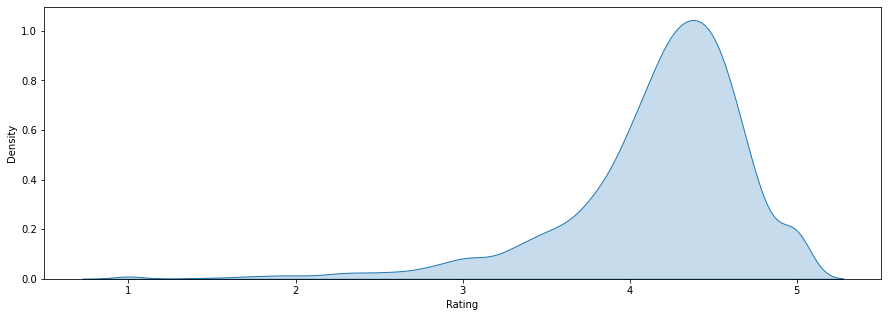

In [54]:
# rating distribution over the apps
sns.kdeplot(ps_df['Rating'], shade = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa424f1e490>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa41fb3ffd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa41fb4a150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa41fb3fdd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa424f1e3d0>,
  <matplotlib.lines.Line2D at 0x7fa424f1edd0>]}

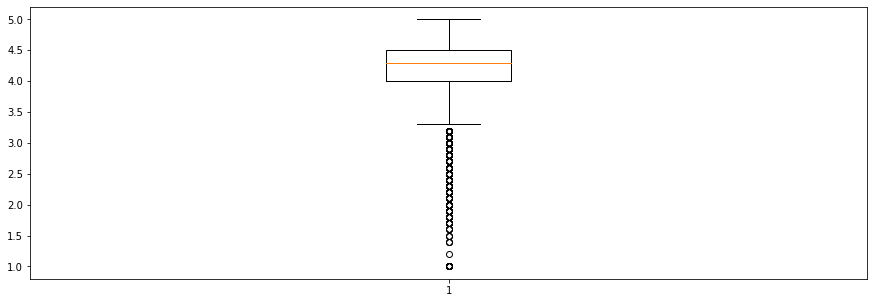

In [58]:
plt.boxplot(ps_df['Rating'])

From the above distribution and box plot we can analysis that maximum number of apps have the rating between 3.8 to 4.5

In [56]:
skew_dist = ps_df['Rating'].skew()
mean = ps_df['Rating'].mean()
median = ps_df['Rating'].median()
print('the skew distribution of ratings',skew_dist)
print('the mean distribution of ratings',mean)
print('the median of disrtibution of ratings',median)

the skew distribution of ratings -1.733457613883763
the mean distribution of ratings 4.171309267241382
the median of disrtibution of ratings 4.3
